In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-language-processing-with-disaster-tweets/sample_submission.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/train.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/test.csv


In [17]:
train_df = pd.read_csv('/kaggle/input/natural-language-processing-with-disaster-tweets/train.csv')
train_df_info = train_df.info()
train_df_head = train_df.head()

train_df_info, train_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


(None,
    id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  )

1. The dataset contains 7613 entries.
2. There are five columns: 'id', 'keyword', 'location', 'text', and 'target'.
3. 'id' is an integer identifier for each tweet.
4. 'keyword' and 'location' are object types (likely strings) and have some missing values. Specifically, 'keyword' has 7552 non-null entries and 'location' has 5080 non-null entries.
5. 'text' is the tweet text.
6. 'target' is an integer that likely represents a binary classification target, possibly indicating whether the tweet is related to a real disaster (1) or not (0).

Since there is the missing values, I will do data cleaning process.

In [18]:
# Check the proprotion of missing values in 'keyword' and 'location' columns
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values/ len(train_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
keyword,61,0.801261
location,2533,33.272035


In [19]:
import re

# Function to clean and preprocess text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the cleaning function to the 'text' column
train_df['text_cleaned'] = train_df['text'].apply(clean_text)

# Display the first few rows of the cleaned text
train_df[['text', 'text_cleaned']].head()

,text,text_cleaned
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


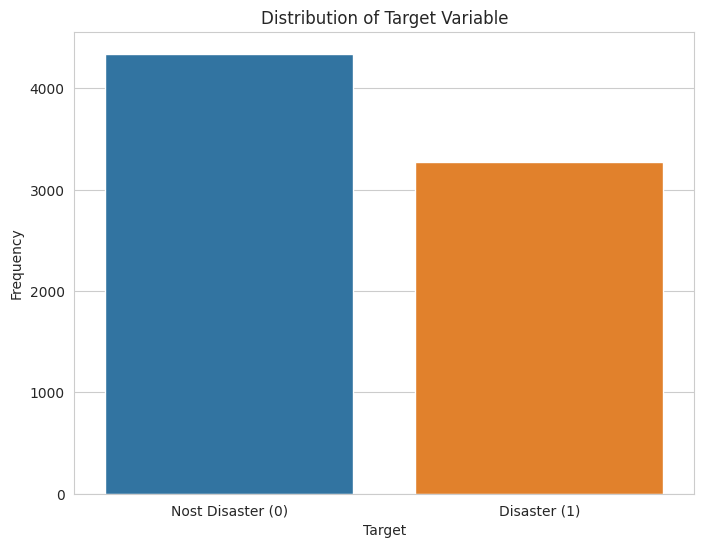

(target
 0    4342
 1    3271
 Name: count, dtype: int64,
 target
 0    57.034021
 1    42.965979
 Name: count, dtype: float64)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Target Variable Analysis
target_counts = train_df['target'].value_counts()
target_percentage = (target_counts / len(train_df)) * 100

# Plotting the distribution of the target variable
plt.figure(figsize=(8,6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks([0,1], ['Nost Disaster (0)', 'Disaster (1)'])
plt.show()

target_counts, target_percentage

Not Disaster (0) : 4342 instances, approximately 57.03% of the dataset.
Disaster (1) : 3271 instances, approximately 42.97% of the dataset.

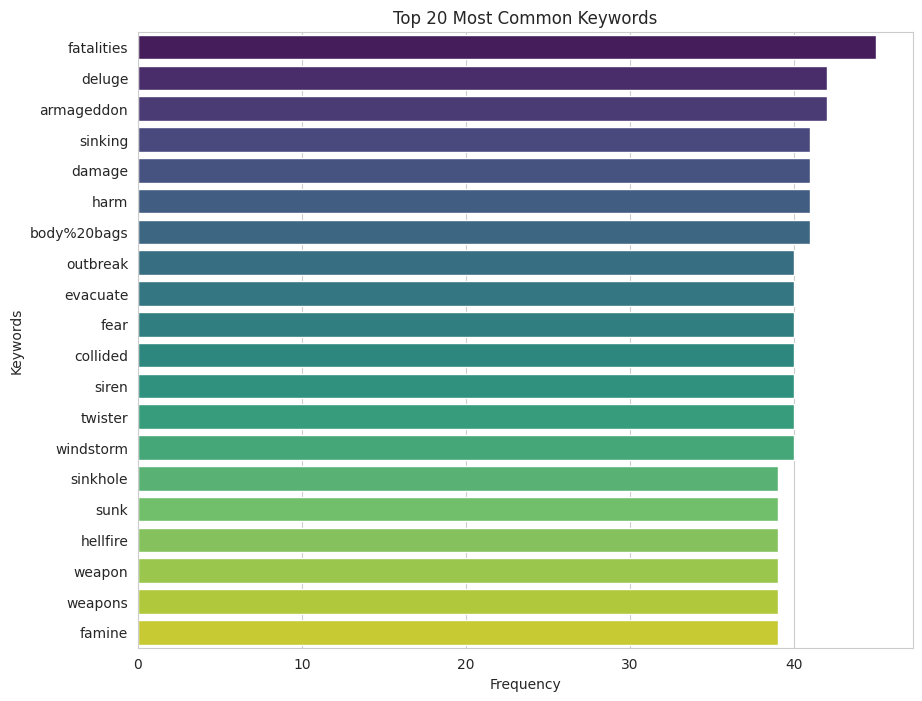

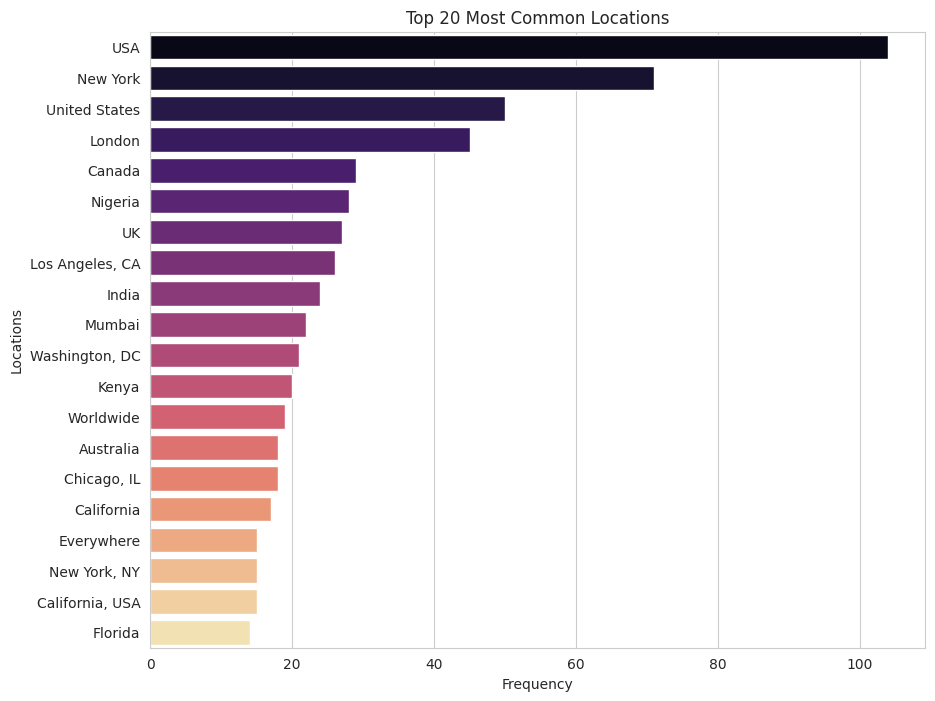

(keyword
 fatalities     45
 deluge         42
 armageddon     42
 sinking        41
 damage         41
 harm           41
 body%20bags    41
 outbreak       40
 evacuate       40
 fear           40
 collided       40
 siren          40
 twister        40
 windstorm      40
 sinkhole       39
 sunk           39
 hellfire       39
 weapon         39
 weapons        39
 famine         39
 Name: count, dtype: int64,
 location
 USA                104
 New York            71
 United States       50
 London              45
 Canada              29
 Nigeria             28
 UK                  27
 Los Angeles, CA     26
 India               24
 Mumbai              22
 Washington, DC      21
 Kenya               20
 Worldwide           19
 Australia           18
 Chicago, IL         18
 California          17
 Everywhere          15
 New York, NY        15
 California, USA     15
 Florida             14
 Name: count, dtype: int64)

In [21]:
# Keyword Analysis: Most common keywords
keyword_counts = train_df['keyword'].value_counts().head(20)

# Location Analysis: Most common locations
location_counts = train_df['location'].value_counts().head(20)

# Plotting the most common keywords
plt.figure(figsize=(10,8))
sns.barplot(y=keyword_counts.index, x=keyword_counts.values, palette='viridis')
plt.title('Top 20 Most Common Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

# Plotting the most common locations
plt.figure(figsize=(10,8))
sns.barplot(y=location_counts.index, x=location_counts.values, palette='magma')
plt.title('Top 20 Most Common Locations')
plt.xlabel('Frequency')
plt.ylabel('Locations')
plt.show()

keyword_counts, location_counts

# Keyword Analysis
The top 20 most common keywords in the dataset include terms like 'fatalities', 'deluge', 'armageddon', 'sinking' and 'damage'. These keywords suggest a strong focus on disaster-related themes.

# Location Analysis
The most frequently occurring locations are:
* General locations like 'USA', 'United States', 'Worlwide'.
* Specific cities like 'New York', 'London', 'Los Angeles, CA,' and 'Mumbai'.

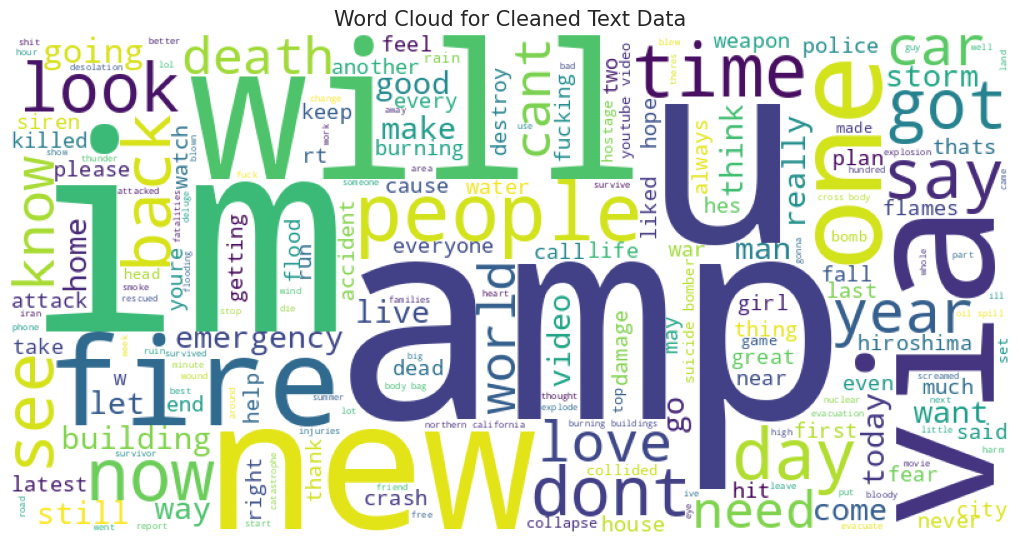

In [22]:
from wordcloud import WordCloud

# Generate a word cloud for the cleaned text
text_combined = ''.join(train_df['text_cleaned'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot the WordCloud image
plt.figure(figsize=(10,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Cleaned Text Data', fontsize=15)
plt.show()

# Text Analysis
The word cloud visualizes the most commmon words in the cleaned text data of the tweets. Words like 'fire', 'news', 'disaster', 'police', and 'emergency' stand out, indicating a strong presence of disaster-related content.

# Machine Learning

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Feature Selection: Using 'text_cleaned' as the feature and 'target' as the label
X = train_df['text_cleaned']
y = train_df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Text Vectorization: Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((6090, 5000), (1523, 5000))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, class_report, conf_matrix

(0.8063033486539725,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.88      0.84       874\n           1       0.82      0.70      0.76       649\n\n    accuracy                           0.81      1523\n   macro avg       0.81      0.79      0.80      1523\nweighted avg       0.81      0.81      0.80      1523\n',
 array([[771, 103],
        [192, 457]]))

# Precision
* For class 0(Not Disaster) : 80%
* For class 1(Disaster): 82%

# Recall
* For class 0: 88%
* For class 1: 70%

# F1-Score
* For class 0: 84%
* For class 1: 76%

# Confusion Matrix
* True negatives: 771
* False positives: 103
* False negatives: 192
* True positives: 457

These results indicate that the model is more effective at identifying non-disaster tweets compared to disaster tweets, as seen in the higher recall for class 0.

Hence, I will use this model to predict the outcome.

In [26]:
# Re-importing necessary libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Redefining the text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Re-load the original train dataset to re-fit the TF-IDF vectorizer
train_file_path = '/kaggle/input/natural-language-processing-with-disaster-tweets/train.csv'
train_df = pd.read_csv(train_file_path)
train_df['text_cleaned'] = train_df['text'].apply(clean_text)

# Re-fitting the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(train_df['text_cleaned'])

# Re-load the new test dataset
new_test_file_path = '/kaggle/input/natural-language-processing-with-disaster-tweets/test.csv'
new_test_df = pd.read_csv(new_test_file_path)

# Clean the text data in the new test dataset
new_test_df['text_cleaned'] = new_test_df['text'].apply(clean_text)

# Vectorizing the cleaned text using the re-fitted TF-IDF vectorizer
X_new_test = tfidf_vectorizer.transform(new_test_df['text_cleaned'])

# Re-training the optimized Logistic Regression model (with previously found optimal parameters)
optimal_log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear')
optimal_log_reg.fit(tfidf_vectorizer.transform(train_df['text_cleaned']), train_df['target'])

# Predicting using the re-trained Logistic Regression model
y_pred_new_test = optimal_log_reg.predict(X_new_test)

# Adding predictions to the new test dataframe
new_test_df['predicted_target'] = y_pred_new_test

# Display the first few rows of the new test dataframe with predictions
new_test_df[['text', 'predicted_target']].head()

,text,predicted_target
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,0
4,Typhoon Soudelor kills 28 in China and Taiwan,1


In [28]:
# Save the DataFrame to CSV file
new_test_df.to_csv('submission.csv', index=False)

The 'predicted_target' column using the Logistic Regression model. The 'predicted_target' column in the new test dataset indicates whether the tweet is predicted to be about a real disaster (1) or not (0).